In [1]:
import pandas as pd

# store_data = pd.read_csv(r"../data/점포.csv")
# sale_data = pd.read_csv(r"../data/매출.csv")
# store_data = pd.read_csv(r"../data/store_data.csv")
# sale_data = pd.read_csv(r"../data/sale_data.csv")///
store_data = store_data.drop('Unnamed: 0', axis=1)
sale_data = sale_data.drop('Unnamed: 0', axis=1)

store_data.columns = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수', '프랜차이즈_점포_수']
sale_data.columns = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

FileNotFoundError: [Errno 2] No such file or directory: '../data/store_data.csv'

In [3]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228399 entries, 0 to 228398
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준_년분기_코드    228399 non-null  int64  
 1   상권_구분_코드     228399 non-null  object 
 2   상권_구분_코드_명   228399 non-null  object 
 3   상권_코드        228399 non-null  int64  
 4   상권_코드_명      228399 non-null  object 
 5   서비스_업종_코드    228399 non-null  int64  
 6   서비스_업종_코드_명  228399 non-null  object 
 7   점포_수         228399 non-null  float64
 8   유사_업종_점포_수   228399 non-null  float64
 9   개업_율         228399 non-null  float64
 10  개업_점포_수      228399 non-null  float64
 11  폐업_률         228399 non-null  float64
 12  폐업_점포_수      228399 non-null  float64
 13  프랜차이즈_점포_수   228399 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 24.4+ MB


In [4]:
store_data['기준_년분기_코드'].unique()
store_data.shape

(228399, 14)

매출 데이터와 점포 데이터를 아래 조건으로 합침

In [5]:
sale_store = pd.merge(sale_data, store_data, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'])

불필요하다고 생각되는 열 drop

In [6]:
sale_store.drop(["개업_율", "폐업_률", '주중_매출_금액', '주말_매출_금액'], axis=1, inplace=True)

In [7]:
sale_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,월요일_매출_금액,...,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,20231,D,발달상권,3120050,서울숲역,100010,커피-음료,2.287190e+08,16371.0,27131928.0,...,3418.0,4305.0,2012.0,876.0,280.0,13.0,15.0,0.0,0.0,2.0
1,20231,D,발달상권,3120054,어린이대공원역,100007,치킨전문점,4.346601e+08,32664.0,18830029.0,...,17381.0,8389.0,2017.0,3425.0,865.0,8.0,15.0,2.0,0.0,7.0
2,20231,A,골목상권,3110757,양평역 2번,200033,부동산중개업,1.175862e+08,10348.0,10582756.0,...,4233.0,5174.0,705.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0
3,20231,R,전통시장,3130024,남대문시장(자유상가),300009,청과상,2.388089e+09,83111.0,336915823.0,...,1439.0,3624.0,8777.0,16469.0,47593.0,8.0,8.0,0.0,0.0,0.0
4,20231,A,골목상권,3110496,모래내우체국,300002,편의점,9.283034e+08,130919.0,121364674.0,...,26583.0,29399.0,32883.0,22500.0,15542.0,0.0,5.0,0.0,0.0,5.0


서비스_업종_코드의 'CS' 제거, int형으로 변환

In [8]:
sale_store['서비스_업종_코드'].unique

<bound method Series.unique of 0        100010
1        100007
2        200033
3        300009
4        300002
          ...  
62851    200030
62852    300021
62853    100006
62854    100010
62855    300014
Name: 서비스_업종_코드, Length: 62856, dtype: int64>

In [9]:
sale_store['서비스_업종_코드'] = sale_store['서비스_업종_코드'].str.replace("CS","")
sale_store['서비스_업종_코드'] = sale_store['서비스_업종_코드'].astype('int64')

AttributeError: Can only use .str accessor with string values!

In [10]:
sale_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,월요일_매출_금액,...,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,20231,D,발달상권,3120050,서울숲역,100010,커피-음료,2.287190e+08,16371.0,27131928.0,...,3418.0,4305.0,2012.0,876.0,280.0,13.0,15.0,0.0,0.0,2.0
1,20231,D,발달상권,3120054,어린이대공원역,100007,치킨전문점,4.346601e+08,32664.0,18830029.0,...,17381.0,8389.0,2017.0,3425.0,865.0,8.0,15.0,2.0,0.0,7.0
2,20231,A,골목상권,3110757,양평역 2번,200033,부동산중개업,1.175862e+08,10348.0,10582756.0,...,4233.0,5174.0,705.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0
3,20231,R,전통시장,3130024,남대문시장(자유상가),300009,청과상,2.388089e+09,83111.0,336915823.0,...,1439.0,3624.0,8777.0,16469.0,47593.0,8.0,8.0,0.0,0.0,0.0
4,20231,A,골목상권,3110496,모래내우체국,300002,편의점,9.283034e+08,130919.0,121364674.0,...,26583.0,29399.0,32883.0,22500.0,15542.0,0.0,5.0,0.0,0.0,5.0


코드-코드명 딕셔너리 형태로 보관

In [11]:
sale_coding = sale_store.set_index('상권_코드')['상권_코드_명'].to_dict()
sale_split_coding = sale_store.set_index('상권_구분_코드')['상권_구분_코드_명'].to_dict()
servce_coding = sale_store.set_index('서비스_업종_코드')['서비스_업종_코드_명'].to_dict()

상권구분코드 원핫인코딩

In [12]:
sale_store['상권_구분_코드'].unique()

array(['D', 'A', 'R', 'U'], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(sale_store[['상권_구분_코드']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['상권_구분_코드']))
sale_store = pd.concat([sale_store, encoded_df], axis=1)

sale_store.drop(columns=['상권_구분_코드'], inplace=True)

In [ ]:
sale_store

수치형 데이터만 선택

In [14]:
numeric_sale_store = sale_store.select_dtypes(["int64", "float64"])
numeric_sale_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62856 entries, 0 to 62855
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        62856 non-null  int64  
 1   상권_코드            62856 non-null  int64  
 2   서비스_업종_코드        62856 non-null  int64  
 3   당월_매출_금액         62856 non-null  float64
 4   당월_매출_건수         62856 non-null  float64
 5   월요일_매출_금액        62856 non-null  float64
 6   화요일_매출_금액        62856 non-null  float64
 7   수요일_매출_금액        62856 non-null  float64
 8   목요일_매출_금액        62856 non-null  float64
 9   금요일_매출_금액        62856 non-null  float64
 10  토요일_매출_금액        62856 non-null  float64
 11  일요일_매출_금액        62856 non-null  float64
 12  시간대_00~06_매출_금액  62856 non-null  float64
 13  시간대_06~11_매출_금액  62856 non-null  float64
 14  시간대_11~14_매출_금액  62856 non-null  float64
 15  시간대_14~17_매출_금액  62856 non-null  float64
 16  시간대_17~21_매출_금액  62856 non-null  float64
 17  시간대_21~24_매출

이상치 삭제

In [15]:
from scipy import stats
import numpy as np
import pandas as pd

# Z-점수 계산
z = np.abs(stats.zscore(numeric_sale_store))
threshold = 3

#이상치를 제외하고 출력
sale_store_z = numeric_sale_store[(z < threshold).all(axis=1)]
sale_store_z.info

<bound method DataFrame.info of        기준_년분기_코드    상권_코드  서비스_업종_코드      당월_매출_금액  당월_매출_건수    월요일_매출_금액  \
0          20231  3120050     100010  2.287190e+08   16371.0   27131928.0   
1          20231  3120054     100007  4.346601e+08   32664.0   18830029.0   
2          20231  3110757     200033  1.175862e+08   10348.0   10582756.0   
3          20231  3130024     300009  2.388089e+09   83111.0  336915823.0   
4          20231  3110496     300002  9.283034e+08  130919.0  121364674.0   
...          ...      ...        ...           ...       ...          ...   
62821      20233  3130324     300018  2.778590e+08   15294.0   64011137.0   
62822      20233  3130325     100001  2.071099e+08    7587.0   13077092.0   
62823      20233  3130325     200028  2.404533e+07     804.0    1470330.0   
62824      20233  3130325     300007  1.806430e+09   68076.0  226145006.0   
62825      20233  3130325     300008  1.282835e+08    8221.0   20074422.0   

         화요일_매출_금액    수요일_매출_금액    목요일_매출_금

이상치 비율 확인

In [18]:
1 - (len(sale_store_z) / len(numeric_sale_store))

0.060042000763650294

이상치 제거 시각화

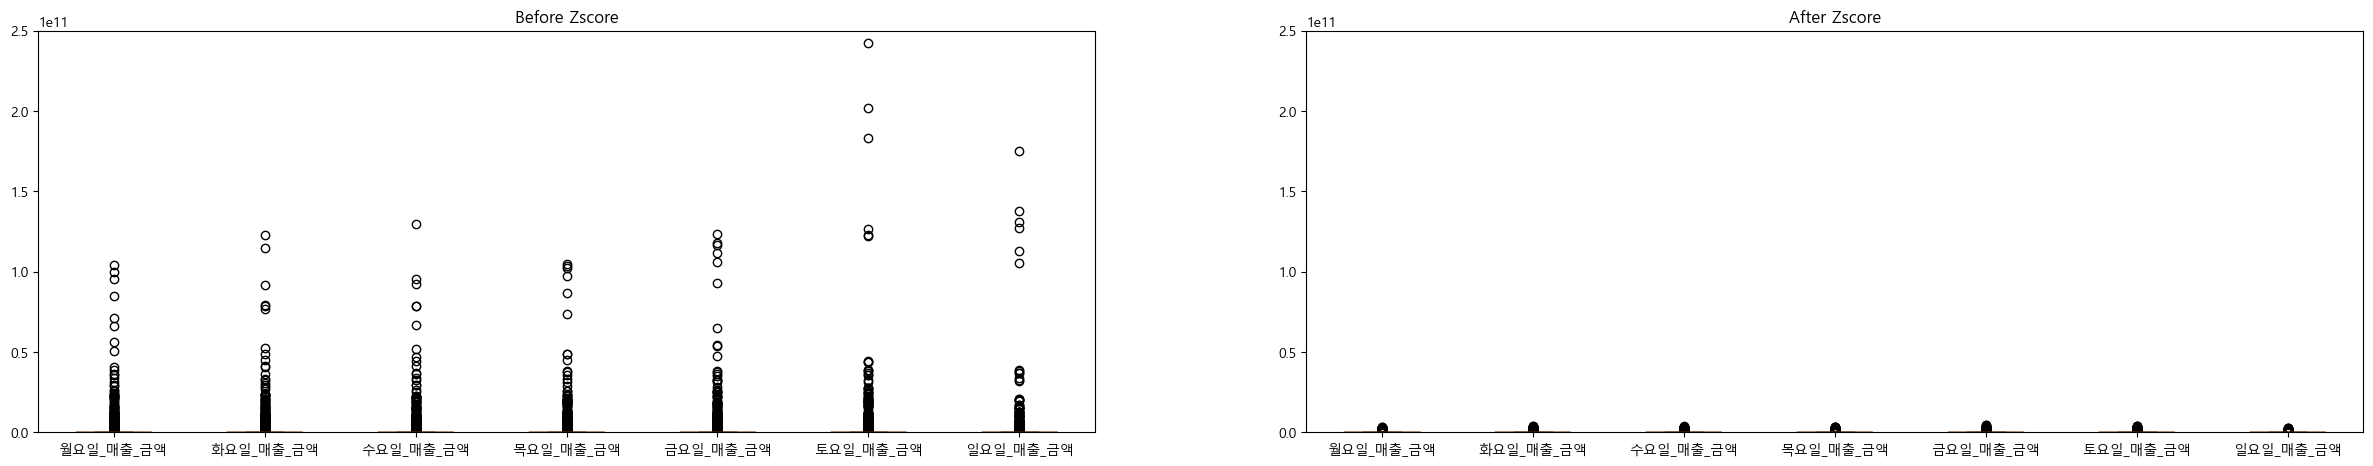

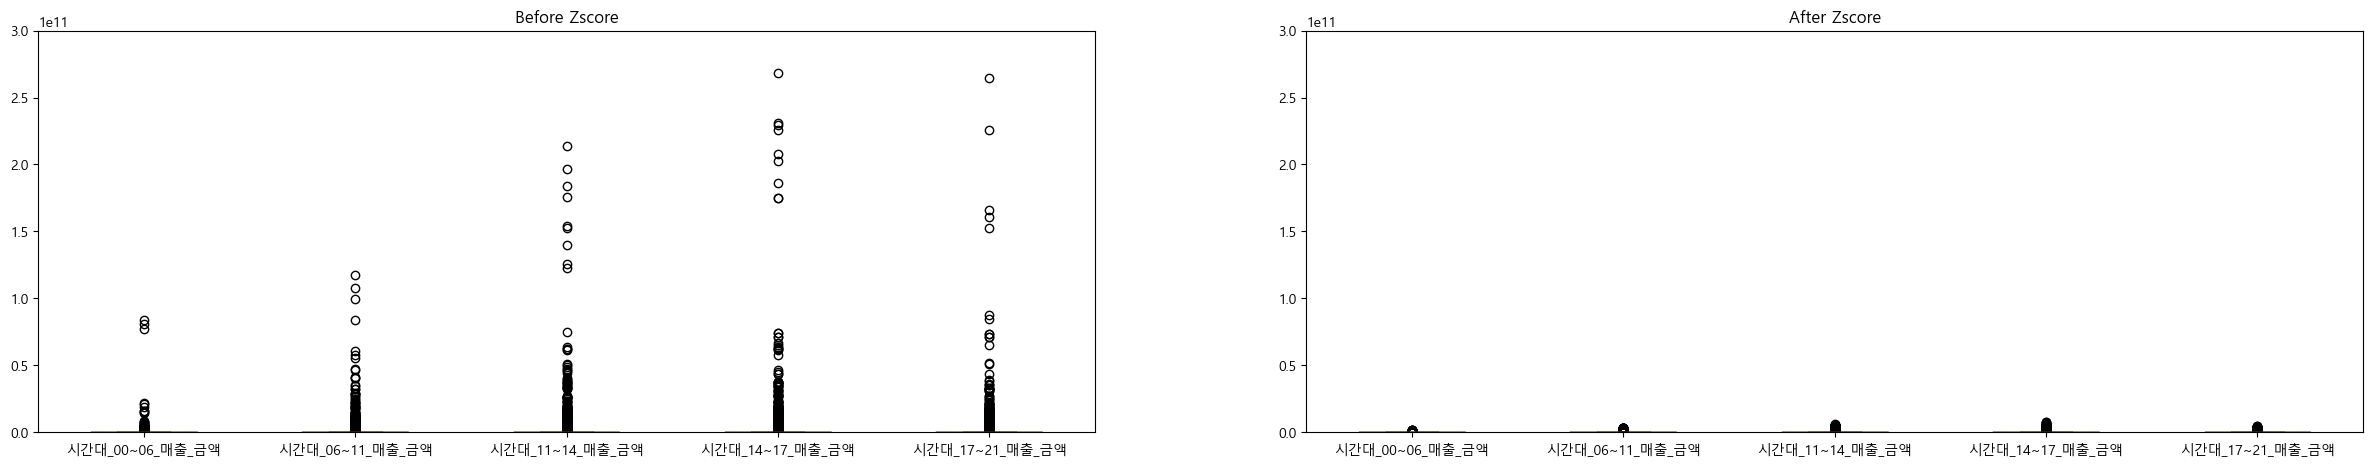

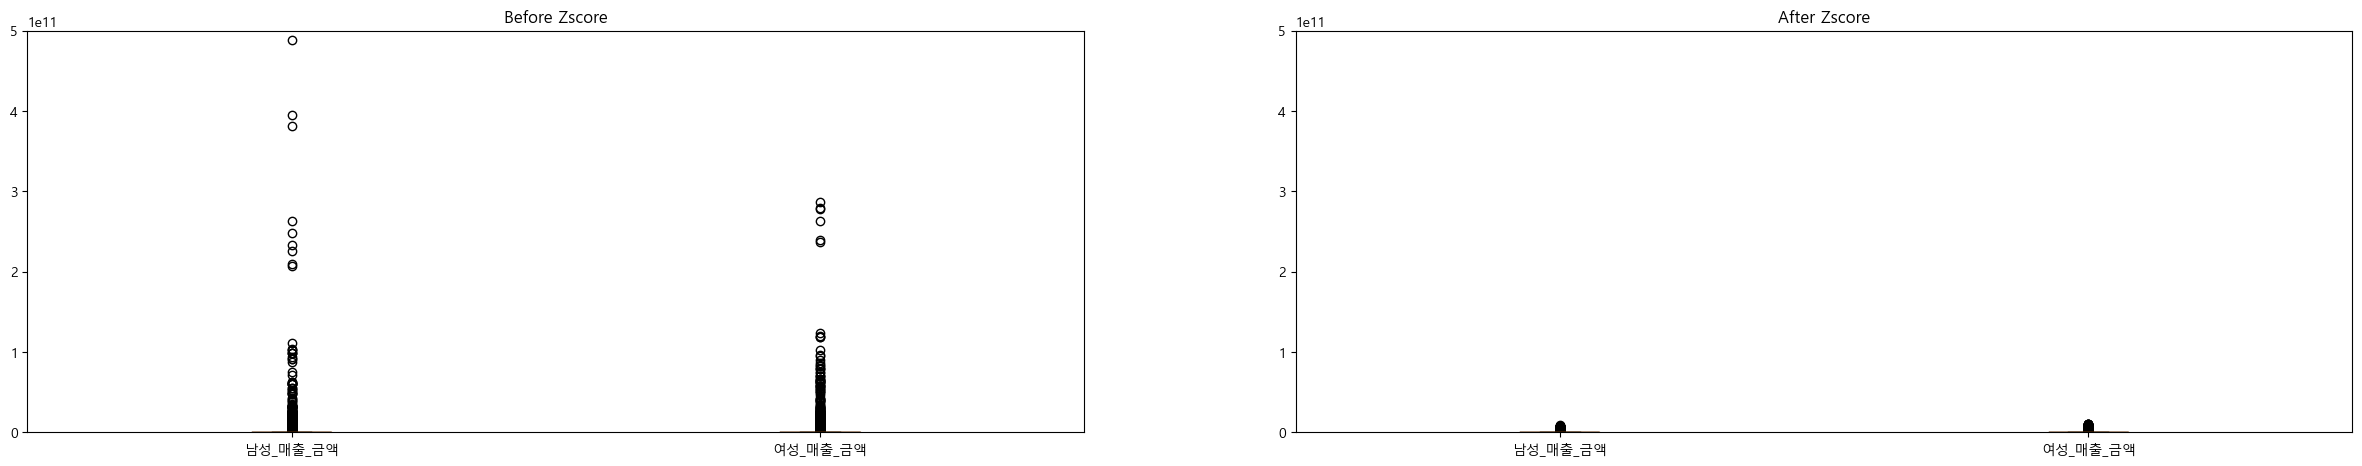

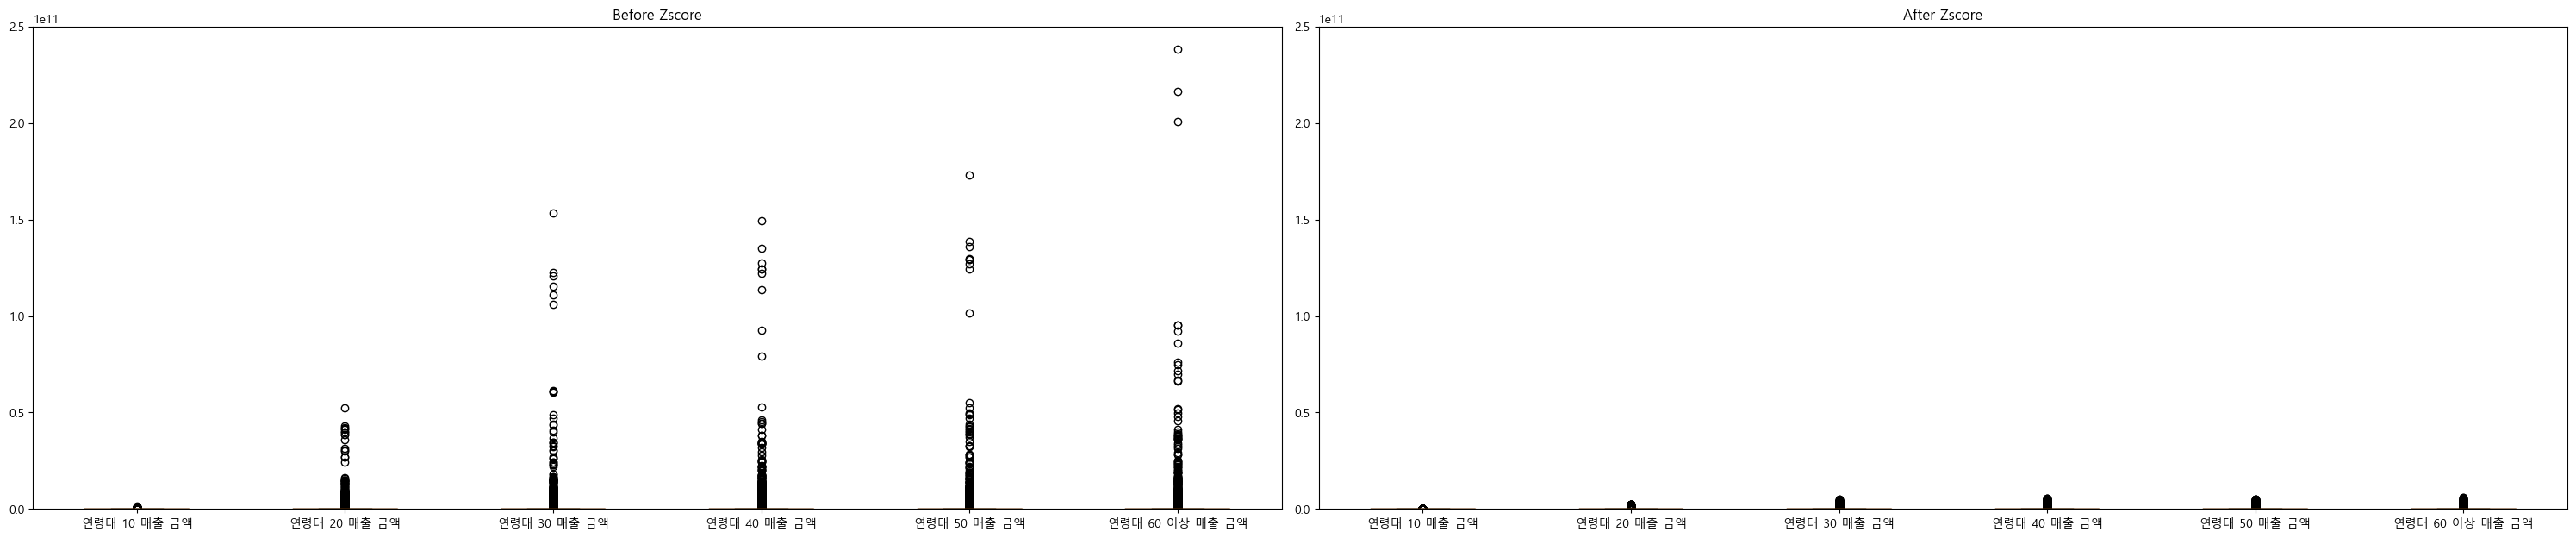

In [29]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

day = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액']
hour = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액']
gender = ['남성_매출_금액', '여성_매출_금액']
age = ['연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액']
l = [day, hour, gender, age]
r = [2.5e11, 3.0e11, 5e11, 2.5e11]

for (i, v), r in zip(enumerate(l), r):
       plt.figure(figsize=(30, 24))
       plt.subplot(4, 2, 2*i + 1)
       plt.boxplot(numeric_sale_store[v].values, labels=v)
       plt.ylim(0, r)
       plt.title('Before Zscore')

       plt.subplot(4, 2, 2*i + 2)
       plt.boxplot(sale_store_z[v].values, labels=v)
       plt.ylim(0, r)
       plt.title('After Zscore')

plt.tight_layout()
plt.show()

학습, 시험데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

X = np.array(sale_store_z.drop(columns=['폐업_점포_수']))
y = np.array(sale_store_z['폐업_점포_수'])

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

스케일러

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [20]:
scaler = StandardScaler()
# scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

모델 학습

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(max_depth=30, random_state=42)
model.fit(X_train_scaled, y_train)

# y_pred = np.round(model.predict(X_test_scaled))
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train_scaled, y_train)
y_pred = polyreg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(X_test_scaled, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

l=[]
m=[]
for i in (r := range(2, 31)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    l.append(mse)
    m.append(r2)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(r, l)
axs[0].set_title('MSE')
axs[1].plot(r, m)
axs[1].set_title('R2')

print('KNR')
plt.show()

모델 학습

In [ ]:
# scaler = StandardScaler()
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(max_depth=30, random_state=42)
model.fit(X_train_scaled, y_train)

# y_pred = np.round(model.predict(X_test_scaled))
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train_scaled, y_train)
y_pred = polyreg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(X_test_scaled, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

l=[]
m=[]
for i in (r := range(2, 31)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    l.append(mse)
    m.append(r2)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(r, l)
axs[0].set_title('MSE')
axs[1].plot(r, m)
axs[1].set_title('R2')

print('KNR')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# LightGBM의 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    # 다른 하이퍼파라미터도 추가 가능
}

# LGBMRegressor 객체 생성
model = LGBMRegressor()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # 음수로 반환된 MSE 값을 다시 양수로 변환하여 출력

# 최적의 모델 추출
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측값 생성
y_pred = best_model.predict(X_test_scaled)

# R² 값 계산
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

모델 학습

In [ ]:
# scaler = StandardScaler()
# # scaler = RobustScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(max_depth=30, random_state=42)
model.fit(X_train_scaled, y_train)

# y_pred = np.round(model.predict(X_test_scaled))
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train_scaled, y_train)
y_pred = polyreg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(X_test_scaled, y_pred)
print("R^2:", r2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

l=[]
m=[]
for i in (r := range(2, 31)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    l.append(mse)
    m.append(r2)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(r, l)
axs[0].set_title('MSE')
axs[1].plot(r, m)
axs[1].set_title('R2')

print('KNR')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# LightGBM의 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    # 다른 하이퍼파라미터도 추가 가능
}

# LGBMRegressor 객체 생성
model = LGBMRegressor()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # 음수로 반환된 MSE 값을 다시 양수로 변환하여 출력

# 최적의 모델 추출
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측값 생성
y_pred = best_model.predict(X_test_scaled)

# R² 값 계산
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

lf, lgb 최적 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 선형 회귀 모델 생성
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],     # 병렬 처리를 위한 작업 수, -1은 가능한 모든 CPU를 사용
    'positive': [True, False] # 예측값이 양수가 되도록 보장
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # 음수로 반환된 MSE 값을 다시 양수로 변환하여 출력

# 테스트 세트로 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test Set MSE:", mse)

# 최적의 모델 추출
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측값 생성
y_pred = best_model.predict(X_test_scaled)

# R² 값 계산
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(range(len(y_test)), y_test, color='blue', label='Target')
axs[0].set_title('Target')
axs[0].set_ylabel('%')

axs[1].plot(range(len(y_pred)), y_pred, color='orange', label='Predicted')
axs[1].set_title('Predicted')
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()

In [ ]:
# LGBMRegressor 객체 생성
model = LGBMRegressor()

# LightGBM의 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    # 다른 하이퍼파라미터도 추가 가능
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # 음수로 반환된 MSE 값을 다시 양수로 변환하여 출력

# 최적의 모델 추출
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측값 생성
y_pred = best_model.predict(X_test_scaled)

# R² 값 계산
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(range(len(y_test)), y_test, color='blue', label='Target')
axs[0].set_title('Target')
axs[0].set_ylabel('%')

axs[1].plot(range(len(y_pred)), y_pred, color='orange', label='Predicted')
axs[1].set_title('Predicted')
axs[1].set_ylabel('%')

plt.tight_layout()
plt.show()